# First, we will import the Indeed training data set into Jupyter. 

Reading data from CSV with Pandas


In [375]:
import pandas as pd
import numpy as np
import glob
from matplotlib.colors import ListedColormap
from pandas.tools.plotting import scatter_plot
from sklearn import datasets as ds
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.lda import LDA

# To read the files from the specified folder, here the data folder 
#glob(/train_*.csv')

In [376]:
# Loading the train_features dataset into features variable
features = pd.read_csv('/train_features_2013-03-07.csv')
features

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68


In [377]:
# Loading the train_salaries dataset into salaries variable
salaries = pd.read_csv('/train_salaries_2013-03-07.csv')
salaries

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163
5,JOB1362684407692,113
6,JOB1362684407693,178
7,JOB1362684407694,73
8,JOB1362684407695,31
9,JOB1362684407696,104


In [378]:
# Merging the features and salaries together so that we have a complete data set
df = pd.merge(features, salaries, how='left')
df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [379]:
df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [380]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
salary                 1000000 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


Calculate the median, min and max years of experience, miles from metropolis and salary from the training data set

Noticed that the minimum salary is zero. Since those zeros represent missing data, we will need to impute a best estimate for those values or remove them. First lets identify how many zeros are in the dataset by creating a dictionary of the counts of the salaries in the dataset

In [381]:
# Getting count of salary values, especially the 0s
counts = df.salary.value_counts()
dict(counts)

{0: 5,
 17: 1,
 18: 3,
 19: 10,
 20: 43,
 21: 49,
 22: 63,
 23: 107,
 24: 129,
 25: 173,
 26: 232,
 27: 309,
 28: 347,
 29: 463,
 30: 518,
 31: 553,
 32: 614,
 33: 743,
 34: 800,
 35: 927,
 36: 1096,
 37: 1108,
 38: 1197,
 39: 1356,
 40: 1449,
 41: 1622,
 42: 1660,
 43: 1816,
 44: 1904,
 45: 2018,
 46: 2248,
 47: 2300,
 48: 2410,
 49: 2516,
 50: 2655,
 51: 2831,
 52: 3000,
 53: 3087,
 54: 3278,
 55: 3332,
 56: 3491,
 57: 3622,
 58: 3803,
 59: 4026,
 60: 4087,
 61: 4384,
 62: 4357,
 63: 4592,
 64: 4706,
 65: 4984,
 66: 5142,
 67: 5258,
 68: 5344,
 69: 5606,
 70: 5797,
 71: 5851,
 72: 6096,
 73: 6173,
 74: 6464,
 75: 6551,
 76: 6730,
 77: 6933,
 78: 7166,
 79: 7221,
 80: 7588,
 81: 7353,
 82: 7879,
 83: 7930,
 84: 8026,
 85: 8346,
 86: 8434,
 87: 8472,
 88: 8724,
 89: 8775,
 90: 9066,
 91: 9189,
 92: 9228,
 93: 9320,
 94: 9236,
 95: 9567,
 96: 9565,
 97: 9773,
 98: 9898,
 99: 9946,
 100: 9937,
 101: 10151,
 102: 10158,
 103: 10285,
 104: 10297,
 105: 10223,
 106: 10204,
 107: 10371,
 108

In [382]:
#Get Summary Statistics from the Data Frame
df.describe()

,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [383]:
#Removed the Zero Salary Values
df = df[df.salary != 0]

In [384]:
df.describe()

,yearsExperience,milesFromMetropolis,salary
count,999995.000000,999995.000000,999995.000000
mean,11.992407,49.529381,116.062398
std,7.212390,28.877721,38.717163
min,0.000000,0.000000,17.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  999995 non-null object
companyId              999995 non-null object
jobType                999995 non-null object
degree                 999995 non-null object
major                  999995 non-null object
industry               999995 non-null object
yearsExperience        999995 non-null int64
milesFromMetropolis    999995 non-null int64
salary                 999995 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [386]:
titles = df.jobType.value_counts()
dict(titles)

{'CEO': 124778,
 'CFO': 124369,
 'CTO': 125045,
 'JANITOR': 124971,
 'JUNIOR': 124592,
 'MANAGER': 125120,
 'SENIOR': 125886,
 'VICE_PRESIDENT': 125234}

In [387]:
major = df.major.value_counts()
dict(major)

{'BIOLOGY': 58379,
 'BUSINESS': 58518,
 'CHEMISTRY': 58875,
 'COMPSCI': 58382,
 'ENGINEERING': 58594,
 'LITERATURE': 58684,
 'MATH': 57800,
 'NONE': 532353,
 'PHYSICS': 58410}

In [388]:
degree = df.degree.value_counts()
dict(degree)

{'BACHELORS': 175495,
 'DOCTORAL': 175362,
 'HIGH_SCHOOL': 236975,
 'MASTERS': 175310,
 'NONE': 236853}

In [389]:
df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [390]:
df.describe()

,yearsExperience,milesFromMetropolis,salary
count,999995.000000,999995.000000,999995.000000
mean,11.992407,49.529381,116.062398
std,7.212390,28.877721,38.717163
min,0.000000,0.000000,17.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [391]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  999995 non-null object
companyId              999995 non-null object
jobType                999995 non-null object
degree                 999995 non-null object
major                  999995 non-null object
industry               999995 non-null object
yearsExperience        999995 non-null int64
milesFromMetropolis    999995 non-null int64
salary                 999995 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [392]:
# Create function to change column order moving salary to the first integer attribute. This is needed for subsequent PCA analysis. 
def change_column_order(df, col_name, index):
    cols = df.columns.tolist()
    cols.remove(col_name)
    cols.insert(index, col_name)
    return df[cols]
df = change_column_order(df, 'salary', 2)

In [393]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  999995 non-null object
companyId              999995 non-null object
salary                 999995 non-null int64
jobType                999995 non-null object
degree                 999995 non-null object
major                  999995 non-null object
industry               999995 non-null object
yearsExperience        999995 non-null int64
milesFromMetropolis    999995 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [394]:
# Import matplot lib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

In [395]:
import seaborn as sns
cmap = sns.diverging_palette(220,10, as_cmap=True)

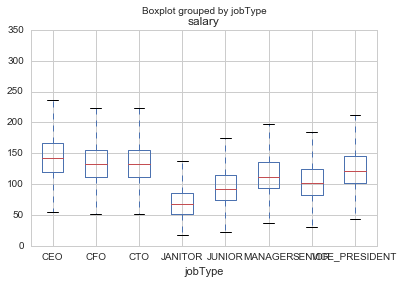

In [396]:
#Lets do Boxplots of Salary Grouped by Job Type
df.boxplot(column='salary', by = 'jobType')

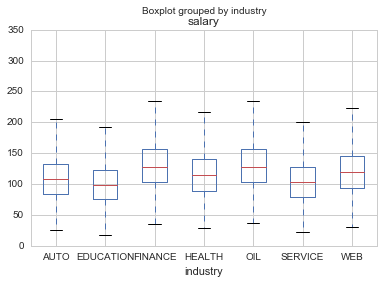

In [397]:
#Lets do Boxplots of  Grouped by Job Type
df.boxplot(column='salary', by = 'industry')

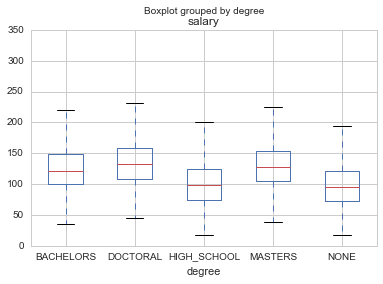

In [398]:
#Lets do Boxplots of  Grouped by Job Type
df.boxplot(column='salary', by = 'degree')

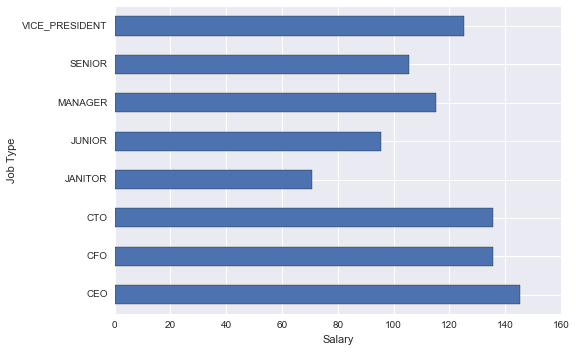

In [25]:
df_cjob = df.groupby(by=df.jobType).mean()
jobSal = df_cjob.salary
ax = jobSal.plot(kind='barh')
ax.set_xlabel("Salary")
ax.set_ylabel("Job Type")

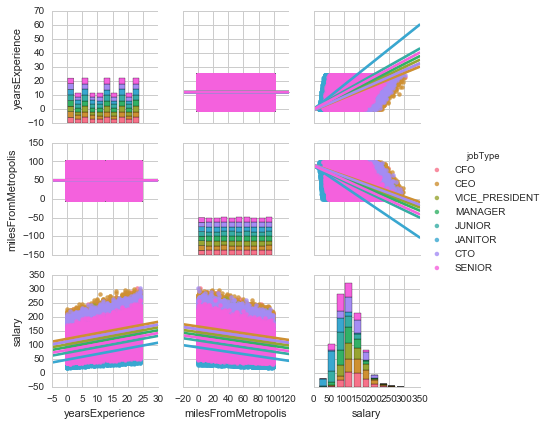

In [130]:
#Axis Grid
sns.diverging_palette(145, 280, s=85, l=25, n=7)
sns.pairplot(df, hue='jobType', size=2, palette="husl", kind='reg')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000010086E898>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000100F823C8>]], dtype=object)

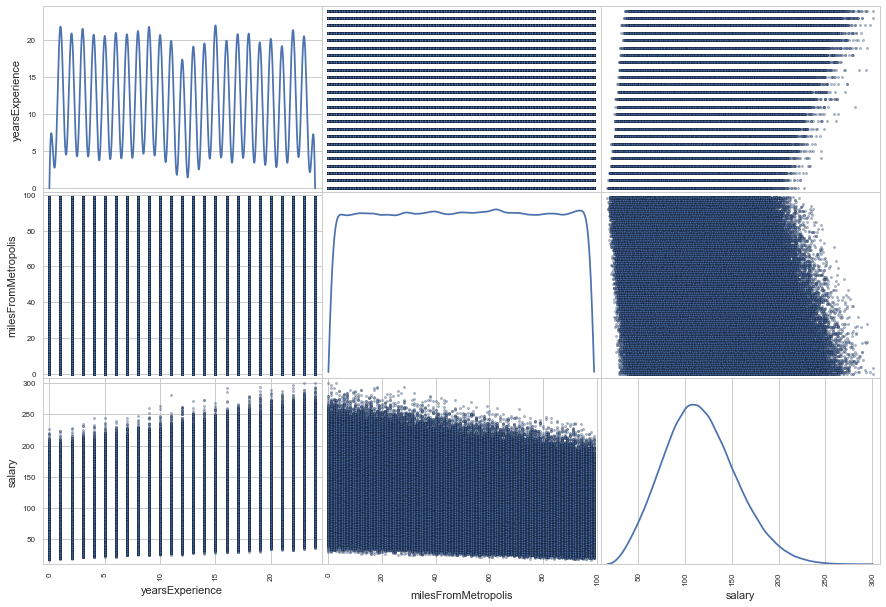

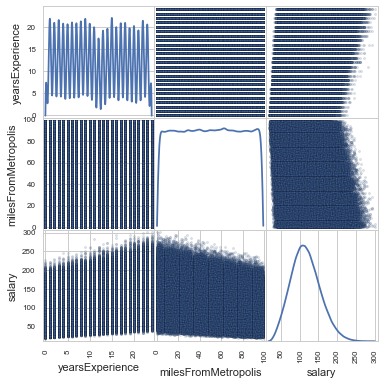

In [131]:
# Scatter plot matrix
from pandas.tools.plotting import scatter_matrix
ax1 = scatter_matrix(df, figsize=(15,10), diagonal='kde')
#scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

In [ ]:
# No of jobTypes per Industry
jobCount = pd.crosstab(df['industry'],df['jobType'], values=df.salary, aggfunc=[np.median])
print jobCount
# Normalize
job_norm= jobCount.div(jobCount.sum(1).astype(float), axis=0)

# Plot as stacked bar chart
job_norm.plot(kind='barh',
             stacked=True,
             title='cross tab plot')
plt.xlabel('Salary')
plt.ylabel('Job Type')
plt.legend(loc='best')

          median                                                       
jobType      CEO  CFO  CTO JANITOR JUNIOR MANAGER SENIOR VICE_PRESIDENT
industry                                                               
AUTO         136  126  126      61     85     106     96            116
EDUCATION    125  116  116      51     76      96     86            105
FINANCE      157  147  147      82    107     126    117            137
HEALTH       142  132  133      67     92     112    102            122
OIL          157  147  147      82    107     127    117            137
SERVICE      130  121  121      56     80     101     91            111
WEB          147  138  138      71     98     118    108            128


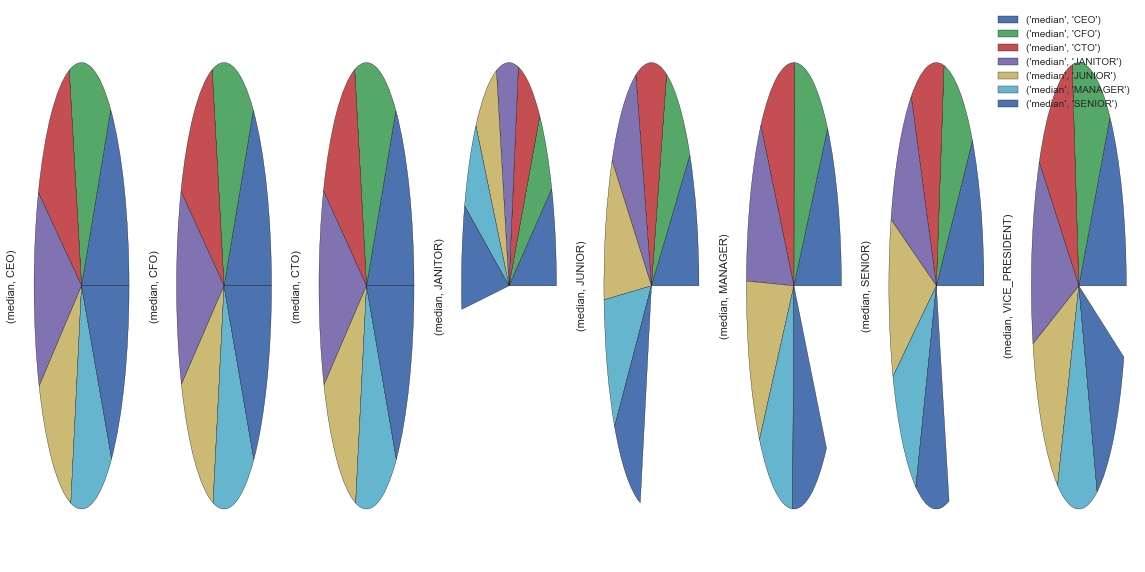

In [400]:
# No of jobTypes per Industry
jobCount = pd.crosstab(df['industry'],df['jobType'],values=df.salary, aggfunc=[np.median])
print jobCount
# Normalize
job_norm= jobCount.div(jobCount.sum(1).astype(float), axis=0)

# Plot as stacked bar chart
job_norm.plot.pie(subplots=True, figsize=(20,10), labels=None, fontsize=10)
plt.legend(jobCount, loc="best")
#plt.xlabel('Salary')
#plt.ylabel('Job Type')

In [401]:
#plt.figure(figsize=(15,10))
#for index, plot_vars in enumerate(vars_to_plot_separate):
    #plt.subplot(len(vars_to_plot_separate)/2,index+1)
    #ax = df.boxplot()
#plt.show()

In [402]:
dfa = pd.get_dummies(df, columns=['jobType', 'degree', 'major', 'industry'], drop_first=False).iloc[:,3:]

In [403]:
df = pd.get_dummies(df, columns=['jobType', 'degree', 'major', 'industry'], drop_first=False)

In [404]:
#Create a list of Categorical Variables

cSuiteJobs = ['jobType_CEO', 'jobType_CFO', 'jobType_CTO'];
jobTypes = ['jobType_CEO', 'jobType_CFO', 'jobType_CTO', 'jobType_JANITOR','jobType_JUNIOR','jobType_MANAGER','jobType_SENIOR', 'jobType_VICE_PRESIDENT'];
college = ['degree_BACHELORS', 'degree_DOCTORAL', 'degree_MASTERS'];
high_School_or_More = ['degree_HIGH_SCHOOL','degree_BACHELORS', 'degree_DOCTORAL', 'degree_MASTERS'];
majors = ['major_BIOLOGY', 'major_BUSINESS', 'major_CHEMISTRY', 'major_COMPSCI', 'major_ENGINEERING', 'major_MATH', 'major_PHYSICS'];
industries = ['industry_AUTO', 'industry_EDUCATION', 'industry_FINANCE', 'industry_HEALTH', 'industry_OIL', 'industry_SERVICE', 'industry_WEB'];

In [405]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999999
Data columns (total 34 columns):
jobId                     999995 non-null object
companyId                 999995 non-null object
salary                    999995 non-null int64
yearsExperience           999995 non-null int64
milesFromMetropolis       999995 non-null int64
jobType_CEO               999995 non-null float64
jobType_CFO               999995 non-null float64
jobType_CTO               999995 non-null float64
jobType_JANITOR           999995 non-null float64
jobType_JUNIOR            999995 non-null float64
jobType_MANAGER           999995 non-null float64
jobType_SENIOR            999995 non-null float64
jobType_VICE_PRESIDENT    999995 non-null float64
degree_BACHELORS          999995 non-null float64
degree_DOCTORAL           999995 non-null float64
degree_HIGH_SCHOOL        999995 non-null float64
degree_MASTERS            999995 non-null float64
degree_NONE               999995 non-null float

In [406]:
#Group by Salary to Determine Median Salary for Each Job Type to Confirm Proper Ordering
df.groupby(by=cSuiteJobs).median()

salary  yearsExperience  \
jobType_CEO jobType_CFO jobType_CTO                            
0.0         0.0         0.0             100               12   
                        1.0             132               12   
            1.0         0.0             132               12   
1.0         0.0         0.0             142               12   

                                     milesFromMetropolis  jobType_JANITOR  \
jobType_CEO jobType_CFO jobType_CTO                                         
0.0         0.0         0.0                           50              0.0   
                        1.0                           50              0.0   
            1.0         0.0                           50              0.0   
1.0         0.0         0.0                           49              0.0   

                                     jobType_JUNIOR  jobType_MANAGER  \
jobType_CEO jobType_CFO jobType_CTO                                    
0.0         0.0         0.0                     0.0              0.0   
                        1.0                     0.0              0.0   
            1.0         0.0                     0.0              0.0   
1.0         0.0         0.0                     0.0              0.0   

                                     jobType_SENIOR  jobType_VICE_PRESIDENT  \
jobType_CEO jobType_CFO jobType_CTO                                           
0.0         0.0         0.0                     0.0                     0.0   
                        1.0                     0.0                     0.0   
            1.0         0.0                     0.0                     0.0   
1.0         0.0         0.0                     0.0                     0.0   

                                     degree_BACHELORS  degree_DOCTORAL  \
jobType_CEO jobType_CFO jobType_CTO                                      
0.0         0.0         0.0                       0.0              0.0   
                        1.0                       0.0              0.0   
            1.0         0.0                       0.0              0.0   
1.0         0.0         0.0                       0.0              0.0   

                                         ...       major_MATH  major_NONE  \
jobType_CEO jobType_CFO jobType_CTO      ...                                
0.0         0.0         0.0              ...              0.0         1.0   
                        1.0              ...              0.0         0.0   
            1.0         0.0              ...              0.0         0.0   
1.0         0.0         0.0              ...              0.0         0.0   

                                     major_PHYSICS  industry_AUTO  \
jobType_CEO jobType_CFO jobType_CTO                                 
0.0         0.0         0.0                    0.0            0.0   
                        1.0                    0.0            0.0   
            1.0         0.0                    0.0            0.0   
1.0         0.0         0.0                    0.0            0.0   

                                     industry_EDUCATION  industry_FINANCE  \
jobType_CEO jobType_CFO jobType_CTO                                         
0.0         0.0         0.0                         0.0               0.0   
                        1.0                         0.0               0.0   
            1.0         0.0                         0.0               0.0   
1.0         0.0         0.0                         0.0               0.0   

                                     industry_HEALTH  industry_OIL  \
jobType_CEO jobType_CFO jobType_CTO                                  
0.0         0.0         0.0                      0.0           0.0   
                        1.0                      0.0           0.0   
            1.0         0.0                      0.0           0.0   
1.0         0.0         0.0                      0.0           0.0   

                                     industry_SERVICE  industry_WEB  
jobT

In [407]:
#Median All Job Types
df.groupby(by=jobTypes).median()

salary  \
jobType_CEO jobType_CFO jobType_CTO jobType_JANITOR jobType_JUNIOR jobType_MANAGER jobType_SENIOR jobType_VICE_PRESIDENT           
0.0         0.0         0.0         0.0             0.0            0.0             0.0            1.0                        122   
                                                                                   1.0            0.0                        102   
                                                                   1.0             0.0            0.0                        112   
                                                    1.0            0.0             0.0            0.0                         92   
                                    1.0             0.0            0.0             0.0            0.0                         68   
                        1.0         0.0             0.0            0.0             0.0            0.0                        132   
            1.0         0.0         0.0             0.0            0.0             0.0            0.0                        132   
1.0         0.0         0.0         0.0             0.0            0.0             0.0            0.0                        142   

                                                                                                                          yearsExperience  \
jobType_CEO jobType_CFO jobType_CTO jobType_JANITOR jobType_JUNIOR jobType_MANAGER jobType_SENIOR jobType_VICE_PRESIDENT                    
0.0         0.0         0.0         0.0             0.0            0.0             0.0            1.0                                  12   
                                                                                   1.0            0.0                                  12   
                                                                   1.0             0.0            0.0                                  12   
                                                    1.0            0.0             0.0            0.0                                  12   
                                    1.0             0.0            0.0             0.0            0.0                                  12   
                        1.0         0.0             0.0            0.0             0.0            0.0                                  12   
            1.0         0.0         0.0             0.0            0.0             0.0            0.0                                  12   
1.0         0.0         0.0         0.0             0.0            0.0             0.0            0.0                                  12   

                                                                                                                          milesFromMetropolis  \
jobType_CEO jobType_CFO jobType_CTO jobType_JANITOR jobType_JUNIOR jobType_MANAGER jobType_SENIOR jobType_VICE_PRESIDENT                        
0.0         0.0         0.0         0.0             0.0            0.0             0.0            1.0                                      49   
                                                                                   1.0            0.0                                      50   
                                                                   1.0             0.0            0.0                                      49   
                                                    1.0            0.0             0.0            0.0                                      50   
                                    1.0             0.0            0.0             0.0            0.0                                      50   
                        1.0         0.0             0.0            0.0             0.0            0.0                                      50   
            1.0         0.0         0.0             0.0            0.0             0.0            0.0                                      50   
1.0         0.0         0.0         0.0             0.0            0.0             0.

In [408]:
#Median All College Degrees
df.groupby(by=college).median()

salary  yearsExperience  \
degree_BACHELORS degree_DOCTORAL degree_MASTERS                            
0.0              0.0             0.0                 97               12   
                                 1.0                127               12   
                 1.0             0.0                132               12   
1.0              0.0             0.0                122               12   

                                                 milesFromMetropolis  \
degree_BACHELORS degree_DOCTORAL degree_MASTERS                        
0.0              0.0             0.0                              49   
                                 1.0                              50   
                 1.0             0.0                              50   
1.0              0.0             0.0                              50   

                                                 jobType_CEO  jobType_CFO  \
degree_BACHELORS degree_DOCTORAL degree_MASTERS                             
0.0              0.0             0.0                     0.0          0.0   
                                 1.0                     0.0          0.0   
                 1.0             0.0                     0.0          0.0   
1.0              0.0             0.0                     0.0          0.0   

                                                 jobType_CTO  jobType_JANITOR  \
degree_BACHELORS degree_DOCTORAL degree_MASTERS                                 
0.0              0.0             0.0                     0.0              0.0   
                                 1.0                     0.0              0.0   
                 1.0             0.0                     0.0              0.0   
1.0              0.0             0.0                     0.0              0.0   

                                                 jobType_JUNIOR  \
degree_BACHELORS degree_DOCTORAL degree_MASTERS                   
0.0              0.0             0.0                        0.0   
                                 1.0                        0.0   
                 1.0             0.0                        0.0   
1.0              0.0             0.0                        0.0   

                                                 jobType_MANAGER  \
degree_BACHELORS degree_DOCTORAL degree_MASTERS                    
0.0              0.0             0.0                         0.0   
                                 1.0                         0.0   
                 1.0             0.0                         0.0   
1.0              0.0             0.0                         0.0   

                                                 jobType_SENIOR      ...       \
degree_BACHELORS degree_DOCTORAL degree_MASTERS                      ...        
0.0              0.0             0.0                        0.0      ...        
                                 1.0                        0.0      ...        
                 1.0             0.0                        0.0      ...        
1.0              0.0             0.0                        0.0      ...        

                                                 major_MATH  major_NONE  \
degree_BACHELORS degree_DOCTORAL degree_MASTERS                           
0.0              0.0             0.0                    0.0         1.0   
                                 1.0                    0.0         0.0   
                 1.0             0.0                    0.0         0.0   
1.0              0.0             0.0                    0.0         0.0   

                                                 major_PHYSICS  industry_AUTO  \
degree_BACHELORS degree_DOCTORAL degree_MASTERS                                 
0.0              0.0             0.0                       0.0            0.0   
                                 1.0                       0.0            0.0   
                 1.0             0.0                       0.0            0.0   
1.0              0.0             0.0                  

In [409]:
#Median High School or More
df.groupby(by=high_School_or_More).median()

salary  \
degree_HIGH_SCHOOL degree_BACHELORS degree_DOCTORAL degree_MASTERS           
0.0                0.0              0.0             0.0                 95   
                                                    1.0                127   
                                    1.0             0.0                132   
                   1.0              0.0             0.0                122   
1.0                0.0              0.0             0.0                 99   

                                                                    yearsExperience  \
degree_HIGH_SCHOOL degree_BACHELORS degree_DOCTORAL degree_MASTERS                    
0.0                0.0              0.0             0.0                          12   
                                                    1.0                          12   
                                    1.0             0.0                          12   
                   1.0              0.0             0.0                          12   
1.0                0.0              0.0             0.0                          12   

                                                                    milesFromMetropolis  \
degree_HIGH_SCHOOL degree_BACHELORS degree_DOCTORAL degree_MASTERS                        
0.0                0.0              0.0             0.0                              49   
                                                    1.0                              50   
                                    1.0             0.0                              50   
                   1.0              0.0             0.0                              50   
1.0                0.0              0.0             0.0                              49   

                                                                    jobType_CEO  \
degree_HIGH_SCHOOL degree_BACHELORS degree_DOCTORAL degree_MASTERS                
0.0                0.0              0.0             0.0                     0.0   
                                                    1.0                     0.0   
                                    1.0             0.0                     0.0   
                   1.0              0.0             0.0                     0.0   
1.0                0.0              0.0             0.0                     0.0   

                                                                    jobType_CFO  \
degree_HIGH_SCHOOL degree_BACHELORS degree_DOCTORAL degree_MASTERS                
0.0                0.0              0.0             0.0                     0.0   
                                                    1.0                     0.0   
                                    1.0             0.0                     0.0   
                   1.0              0.0             0.0                     0.0   
1.0                0.0              0.0             0.0                     0.0   

                                                                    jobType_CTO  \
degree_HIGH_SCHOOL degree_BACHELORS degree_DOCTORAL degree_MASTERS                
0.0                0.0              0.0             0.0                     0.0   
                                                    1.0                     0.0   
                                    1.0             0.0                     0.0   
                   1.0              0.0             0.0                     0.0   
1.0                0.0              0.0             0.0                     0.0   

                                                                    jobType_JANITOR  \
degree_HIGH_SCHOOL degree_BACHELORS degree_DOCTORAL degree_MASTERS                    
0.0                0.0              0.0             0.0                         0.0   
                                                    1.0                         0.0   
                                    1.0             0.0                         0.0   
                   1.0              0.0             0.0                         0.0   
1.0  

In [410]:
#Median All Majors
df.groupby(by=majors).median()

salary  \
major_BIOLOGY major_BUSINESS major_CHEMISTRY major_COMPSCI major_ENGINEERING major_MATH major_PHYSICS           
0.0           0.0            0.0             0.0           0.0               0.0        0.0               102   
                                                                                        1.0               127   
                                                                             1.0        0.0               130   
                                                           1.0               0.0        0.0               135   
                                             1.0           0.0               0.0        0.0               129   
                             1.0             0.0           0.0               0.0        0.0               126   
              1.0            0.0             0.0           0.0               0.0        0.0               132   
1.0           0.0            0.0             0.0           0.0               0.0        0.0               125   

                                                                                                       yearsExperience  \
major_BIOLOGY major_BUSINESS major_CHEMISTRY major_COMPSCI major_ENGINEERING major_MATH major_PHYSICS                    
0.0           0.0            0.0             0.0           0.0               0.0        0.0                         12   
                                                                                        1.0                         12   
                                                                             1.0        0.0                         12   
                                                           1.0               0.0        0.0                         12   
                                             1.0           0.0               0.0        0.0                         12   
                             1.0             0.0           0.0               0.0        0.0                         12   
              1.0            0.0             0.0           0.0               0.0        0.0                         12   
1.0           0.0            0.0             0.0           0.0               0.0        0.0                         12   

                                                                                                       milesFromMetropolis  \
major_BIOLOGY major_BUSINESS major_CHEMISTRY major_COMPSCI major_ENGINEERING major_MATH major_PHYSICS                        
0.0           0.0            0.0             0.0           0.0               0.0        0.0                             50   
                                                                                        1.0                             49   
                                                                             1.0        0.0                             50   
                                                           1.0               0.0        0.0                             50   
                                             1.0           0.0               0.0        0.0                             50   
                             1.0             0.0           0.0               0.0        0.0                             50   
              1.0            0.0             0.0           0.0               0.0        0.0                             50   
1.0           0.0            0.0             0.0           0.0               0.0        0.0                             50   

                                                                                                       jobType_CEO  \
major_BIOLOGY major_BUSINESS major_CHEMISTRY major_COMPSCI major_ENGINEERING major_MATH major_PHYSICS                
0.0           0.0            0.0             0.0           0.0               0.0        0.0                    0.0   
                                                                                        1.0                    0.0   
                  

In [411]:
#Median All Industries
df.groupby(by=industries).median()

salary  \
industry_AUTO industry_EDUCATION industry_FINANCE industry_HEALTH industry_OIL industry_SERVICE industry_WEB           
0.0           0.0                0.0              0.0             0.0          0.0              1.0              119   
                                                                               1.0              0.0              103   
                                                                  1.0          0.0              0.0              128   
                                                  1.0             0.0          0.0              0.0              114   
                                 1.0              0.0             0.0          0.0              0.0              128   
              1.0                0.0              0.0             0.0          0.0              0.0               98   
1.0           0.0                0.0              0.0             0.0          0.0              0.0              108   

                                                                                                              yearsExperience  \
industry_AUTO industry_EDUCATION industry_FINANCE industry_HEALTH industry_OIL industry_SERVICE industry_WEB                    
0.0           0.0                0.0              0.0             0.0          0.0              1.0                        12   
                                                                               1.0              0.0                        12   
                                                                  1.0          0.0              0.0                        12   
                                                  1.0             0.0          0.0              0.0                        12   
                                 1.0              0.0             0.0          0.0              0.0                        12   
              1.0                0.0              0.0             0.0          0.0              0.0                        12   
1.0           0.0                0.0              0.0             0.0          0.0              0.0                        12   

                                                                                                              milesFromMetropolis  \
industry_AUTO industry_EDUCATION industry_FINANCE industry_HEALTH industry_OIL industry_SERVICE industry_WEB                        
0.0           0.0                0.0              0.0             0.0          0.0              1.0                            49   
                                                                               1.0              0.0                            50   
                                                                  1.0          0.0              0.0                            49   
                                                  1.0             0.0          0.0              0.0                            50   
                                 1.0              0.0             0.0          0.0              0.0                            50   
              1.0                0.0              0.0             0.0          0.0              0.0                            50   
1.0           0.0                0.0              0.0             0.0          0.0              0.0                            50   

                                                                                                              jobType_CEO  \
industry_AUTO industry_EDUCATION industry_FINANCE industry_HEALTH industry_OIL industry_SERVICE industry_WEB                
0.0           0.0                0.0              0.0             0.0          0.0              1.0                   0.0   
                                                                               1.0              0.0                   0.0   
                                                                  1.0          0.0              0.0                   0.0   
                                            

In [412]:
#sRange = pd.crosstab([df['industry'],df['jobType']],df.sal_Range.astype(int))

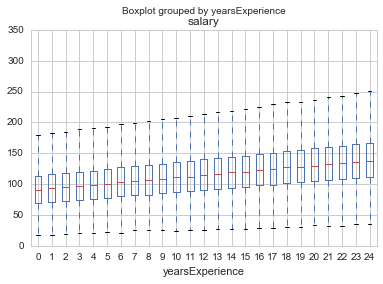

In [413]:
#Lets do Boxplots of  Grouped by jobType, YearsExp
df.boxplot(column='salary', by = 'yearsExperience')

In [414]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999999
Data columns (total 34 columns):
jobId                     999995 non-null object
companyId                 999995 non-null object
salary                    999995 non-null int64
yearsExperience           999995 non-null int64
milesFromMetropolis       999995 non-null int64
jobType_CEO               999995 non-null float64
jobType_CFO               999995 non-null float64
jobType_CTO               999995 non-null float64
jobType_JANITOR           999995 non-null float64
jobType_JUNIOR            999995 non-null float64
jobType_MANAGER           999995 non-null float64
jobType_SENIOR            999995 non-null float64
jobType_VICE_PRESIDENT    999995 non-null float64
degree_BACHELORS          999995 non-null float64
degree_DOCTORAL           999995 non-null float64
degree_HIGH_SCHOOL        999995 non-null float64
degree_MASTERS            999995 non-null float64
degree_NONE               999995 non-null float

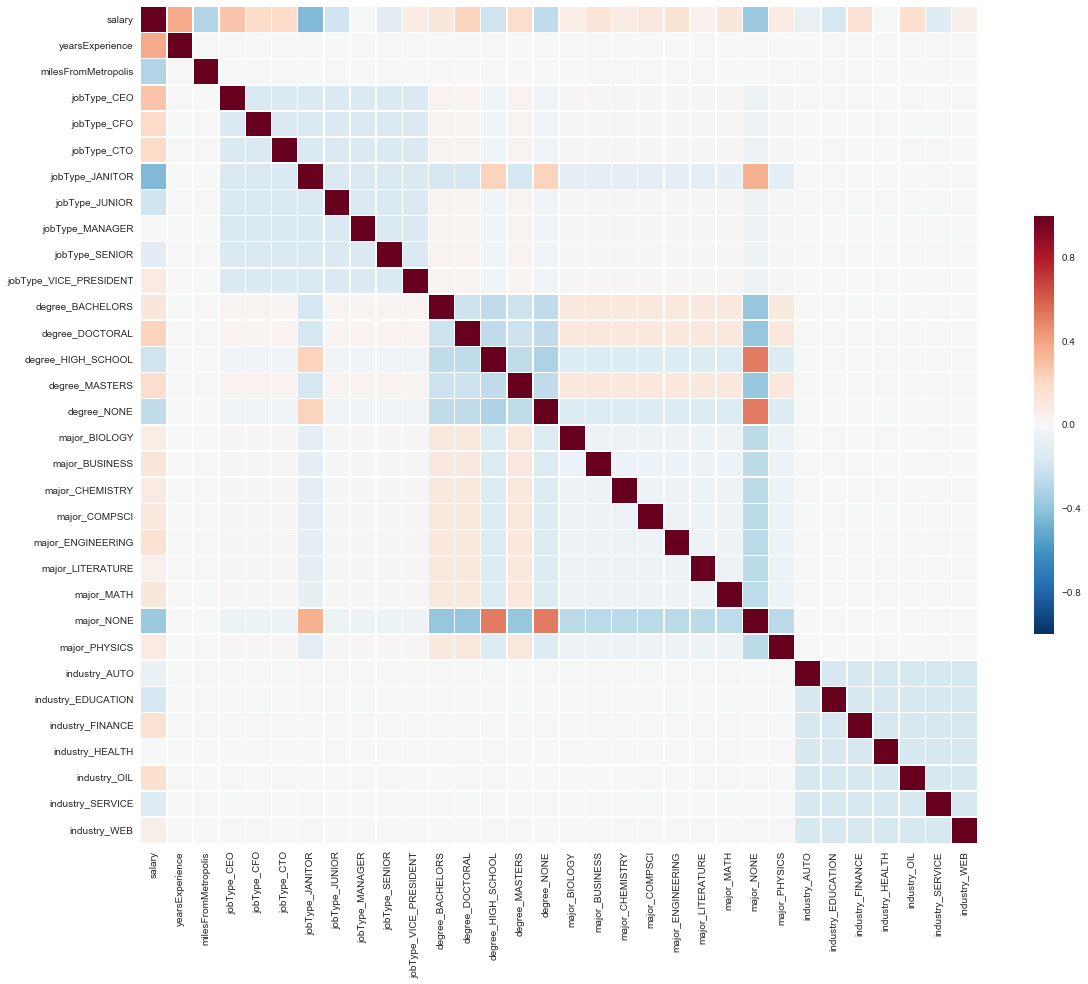

In [415]:
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
#mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, #annot=True, cmap=cmap, vmax=.3,
            square=True, #xticklabels=2, #yticklabels=2,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

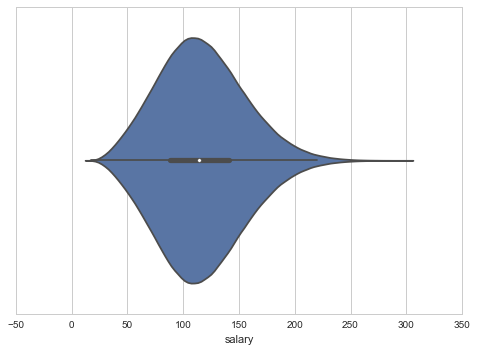

In [416]:
sns.set_style("whitegrid")
ax = sns.violinplot(x=df["salary"])


In [417]:
#cov_mat = np.cov(df.T)
#eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
#print('\nEigenvalues \n%s' % eigen_vals)

In [418]:
#from matplotlib.colors import ListedColormap
#from sklearn.cross_validation import train_test_split
#from sklearn.preprocessing import StandardScaler
#from sklearn.linear_model import LogisticRegression
#from sklearn.decomposition import PCA
##Create X and Y Values from the Data Frame
#X, y =dfa.iloc[:, 1:].values, dfa.iloc[:, 0].values
#X_train, X_test, y_train, y_test = \
    #train_test_split(X, y,
    #test_size=0.7, random_state=0)
#sc = StandardScaler()
#X_train_std = sc.fit_transform(X_train)
#X_test_std = sc.transform(X_test)
#Create Function for the Logistic Regression Plot
#def plot_decision_regions(X, y, classifier, resolution=.02):
    #Setup marker generator and color map
    #markers =('s', 'x', 'o', '^', 'v')
    #colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    #cmap = ListedColormap(colors[:len(np.unique(y))])
    #Plot the decision surface
    #x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() +1
    #x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() +1
    #xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           #np.arange(x2_min, x2_max, resolution))
    #z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    #z = Z.reshape(xx1.shape)
    #plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    #plt.xlim(xx1.min(), xx1.max())
    #plt.ylim(xx2.min(), xx2.max())
    #plot class samples
    #for idx, cl in enumerate (np.unique(y)):
        #plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    #alpha=0.8, c=cmap(idx),
                    #marker=markers[idx], label=cl)
#Perform Logistic Regression
#pca = PCA(n_components=None)
#lr = LogisticRegression()
#X_train_pca = pca.fit_transform(X_train_std)
#X_test_pca = pca.transform(X_test_std)
#lr.fit(X_train_pca, y_train)
#plot_decision_regions(X_train_pca, y_train, classifier=lr)
#plt.xlabel('PC1')
#plt.xlabel('PC2')
#plt.legend(loc='lower left')
#plt.show()
#pca.explained_variance_ration_

In [419]:
salMean = df.salary.mean()
df['salTrue']=df.salary>salMean

In [420]:
# Create function to change column order moving salary to the first integer attribute. This is needed for subsequent PCA analysis. 
def change_column_order(df, col_name, index):
    cols = df.columns.tolist()
    cols.remove(col_name)
    cols.insert(index, col_name)
    return df[cols]
df = change_column_order(df, 'salTrue', 3)

In [421]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999999
Data columns (total 35 columns):
jobId                     999995 non-null object
companyId                 999995 non-null object
salary                    999995 non-null int64
salTrue                   999995 non-null bool
yearsExperience           999995 non-null int64
milesFromMetropolis       999995 non-null int64
jobType_CEO               999995 non-null float64
jobType_CFO               999995 non-null float64
jobType_CTO               999995 non-null float64
jobType_JANITOR           999995 non-null float64
jobType_JUNIOR            999995 non-null float64
jobType_MANAGER           999995 non-null float64
jobType_SENIOR            999995 non-null float64
jobType_VICE_PRESIDENT    999995 non-null float64
degree_BACHELORS          999995 non-null float64
degree_DOCTORAL           999995 non-null float64
degree_HIGH_SCHOOL        999995 non-null float64
degree_MASTERS            999995 non-null float64


In [422]:
#Create Salary Median Cut Point
#cut_points = [116]
#labels = ["low","high"]
#df["salary_Bin"] = binning(df["salary"], cut_points, labels)
#print pd.value_counts(df["salary_Bin"], sort=False)





In [424]:
#y, X = dmatrices('salTrue ~ yearsExperience + milesFromMetropolis + salary + jobType_CEO + jobType_CFO, + jobType_CTO + \
                #jobType_JANITOR + jobType_JUNIOR + jobType_MANAGER + jobType_SENIOR + jobType_VICE_PRESIDENT + degree_BACHELORS + \
                #degree_DOCTORAL + degree_HIGH_SCHOOL + degree_MASTERS + degree_NONE + major_BIOLOGY + major_BUSINESS + \
                #major_CHEMISTRY + major_COMPSCI + major_ENGINEERING + major_LITERATURE + major_MATH + major_NONE + \
                #major_PHYSICS + industry_AUTO + industry_EDUCATION + industry_FINANCE + industry_HEALTH + industry_OIL + \
                #industry_SERVICE + industry_WEB',
                 #df, return_type="dataframe")
#print X.columns

In [ ]:
#salMean = df.salary.mean()
#df.groupby(by=df.salary>salMean)
#df_sal_bin = df.groupby(by=df.salary>salMean)

In [ ]:
from matplotlib.colors import ListedColormap
from pandas.tools.plotting import scatter_plot
from sklearn import datasets as ds
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.lda import LDA
#Create X and Y Values from the Data Frame
X, y, z=df.iloc[:, 4:].values, df.iloc[:, 2].values, df.iloc[:, 3]
#print X, y, z
X_train, X_test, y_train, y_test, z_train, z_test= \
    train_test_split(X, y, z,
    test_size=0.7, random_state=0)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenValues \n%s' % eigen_vals)
print('\nEigenVectors \n%s' % eigen_vecs)

In [ ]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1,32), var_exp, alpha=.5, align='center', label='individual explained variance')
plt.step(range(1,32), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [ ]:
#Sort the eigenpairs by decreasing order of the eigenvalues
eigen_pairs =[(np.abs(eigen_vals[i]), eigen_vecs[:,i])
              for i in range (len(eigen_vals))]
eigen_pairs.sort (reverse=True)

In [ ]:
#Create a 31 x 2 Dimensional projectiion matrix from the top two eigenvectors.
w= np.hstack((eigen_pairs[0][1][:, np.newaxis], 
             eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

In [ ]:
#Transform a sample X(represented as a 1X31 dimensional row vector) onto the PCA subspace obtaining the x', a two dimensional sample vector consisting of two new features
X_train_std[0].dot(w)

In [ ]:
#Transform the entire 300,000 x 31 dimensional training dataset onto the two principal components by calculating the matrix dot product.
X_train_pca = X_train_std.dot(w)

In [ ]:
#Finally we wil visualize the transformed Indeed training set, now onto a 300,000 x 32 Dimensional Matrix, in a two Dimensional Scatterplot
#colors = ['r', 'b', 'g']
#markers = ['s', 'x', 'o']
#for l, c, m in zip(np.unique(y_train), colors, markers):
    #plt.scatter(X_train_pca[y_train==1, 0],
                #X_train_pca[y_train==1, 1],
                #c=c, label=l, marker=m)
    #plt.xlabel('PC 1')
    #plt.ylabel('PC 2')
    #plt.legend(loc='lower left')
    #plt.show()

In [ ]:
#Perform PCA and LDA from Sci Kit Learn
pca = PCA(n_components=2)
lr = LogisticRegression()
X_train_pca = pca.fit(X).transform(X)
lda = LDA(n_components=2)
X_train_lda = lda.fit(X, y).transform(X)
#X_test_pca = pca.transform(X_test_std)
#lr.fit(X_train_pca, y_train)
#plot_decision_regions(X_train_pca, y_train, classifier=lr)
#plt.xlabel('PC1')
#plt.xlabel('PC2')
#plt.legend(loc='lower left')
#plt.show()
print 'pca:', pca.components_,
print 'lda:', lda.scalings_.T

In [ ]:
# Create a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X_train, z_train)

# check the accuracy on the training set
model.score(X_train, z_train)

In [ ]:
# What Percentage Had Salary Greater Than the Mean?
z_train.mean()

In [ ]:
#y, X = dmatrices('salTrue ~ yearsExperience + milesFromMetropolis + salary + jobType_CEO + jobType_CFO, + jobType_CTO + \
                #jobType_JANITOR + jobType_JUNIOR + jobType_MANAGER + jobType_SENIOR + jobType_VICE_PRESIDENT + degree_BACHELORS + \
                #degree_DOCTORAL + degree_HIGH_SCHOOL + degree_MASTERS + degree_NONE + major_BIOLOGY + major_BUSINESS + \
                #major_CHEMISTRY + major_COMPSCI + major_ENGINEERING + major_LITERATURE + major_MATH + major_NONE + \
                #major_PHYSICS + industry_AUTO + industry_EDUCATION + industry_FINANCE + industry_HEALTH + industry_OIL + \
                #industry_SERVICE + industry_WEB',
                  #df, return_type="dataframe")
#print X.columns

In [ ]:
# examine the coefficients
from patsy import dmatrices
#df = pd.DataFrame(columns = ['X_train', 'z_train','yearsExperience', 'milesFromMetropolis', 'salary', 'jobType_CEO', 
                                    #'jobType_CFO', 'jobType_CTO', 'jobType_JANITOR', 'jobType_JUNIOR', 'jobType_MANAGER', 
                                    #'jobType_SENIOR', 'jobType_VICE_PRESIDENT', 'degree_BACHELORS', 'degree_DOCTORAL', 
                                    #'degree_HIGH_SCHOOL', 'degree_MASTERS', 'degree_NONE', 'major_BIOLOGY', 'major_BUSINESS' 
                                    #'major_CHEMISTRY', 'major_COMPSCI', 'major_ENGINEERING', 'major_LITERATURE', 'major_MATH'
                                    #'major_NONE', 'major_PHYSICS', 'industry_AUTO', 'industry_EDUCATION', 'industry_FINANCE', 
                                    #'industry_HEALTH', 'industry_OIL', 'industry_SERVICE', 'industry_WEB'])
#print(pd.DataFrame(np.transpose(model.coef_),X_train))
pd.DataFrame(zip(X_train, np.transpose(model.coef_)))

In [ ]:
#Inoperable Code

##formatting of weights into readable strings
#def get_feature_names_from_weights(weights, names):
    #tmp_array = []
    #for comp in weights:
        #tmp_string = ''
        #for fidx,f in enumerate(names):
            #if fidx>0 and comp[fidx]>=0:
                #tmp_string+='+'
            #tmp_string += '%.2f*%s ' % (comp[fidx],f[:-5])
        #tmp_array.append(tmp_string)
    #return tmp_array

##now let's get to the Data Analytics!
#pca_weight_strings = get_feature_names_from_weights(pca.components_, dfa) 
#lda_weight_strings = get_feature_names_from_weights(lda.scalings_.T, dfa)
#pca_weight = (pca.components_, dfa)
#lda_weight = (lda.scalings_.T, dfa)

## create some pandas dataframes from the transformed outputs
#df_pca = pd.DataFrame(X_train_pca,columns=[pca_weight_strings])
#df_lda = pd.DataFrame(X_train_lda,columns=[lda_weight_strings])

##scatter plot the output, with the names crated from the weights
#ax = scatter_plot(df_pca, pca_weight_strings[0], pca_weight_strings[1], c=y, s=(y+2)*10)
#newfig = plt.figure()
#ax = scatter_plot(df_lda, lda_weights[0], lda_weight[1], c=y, s=(y+2)*10)
#plt.show()